## Illia Tsuprun KA-14mp
## Variant 17

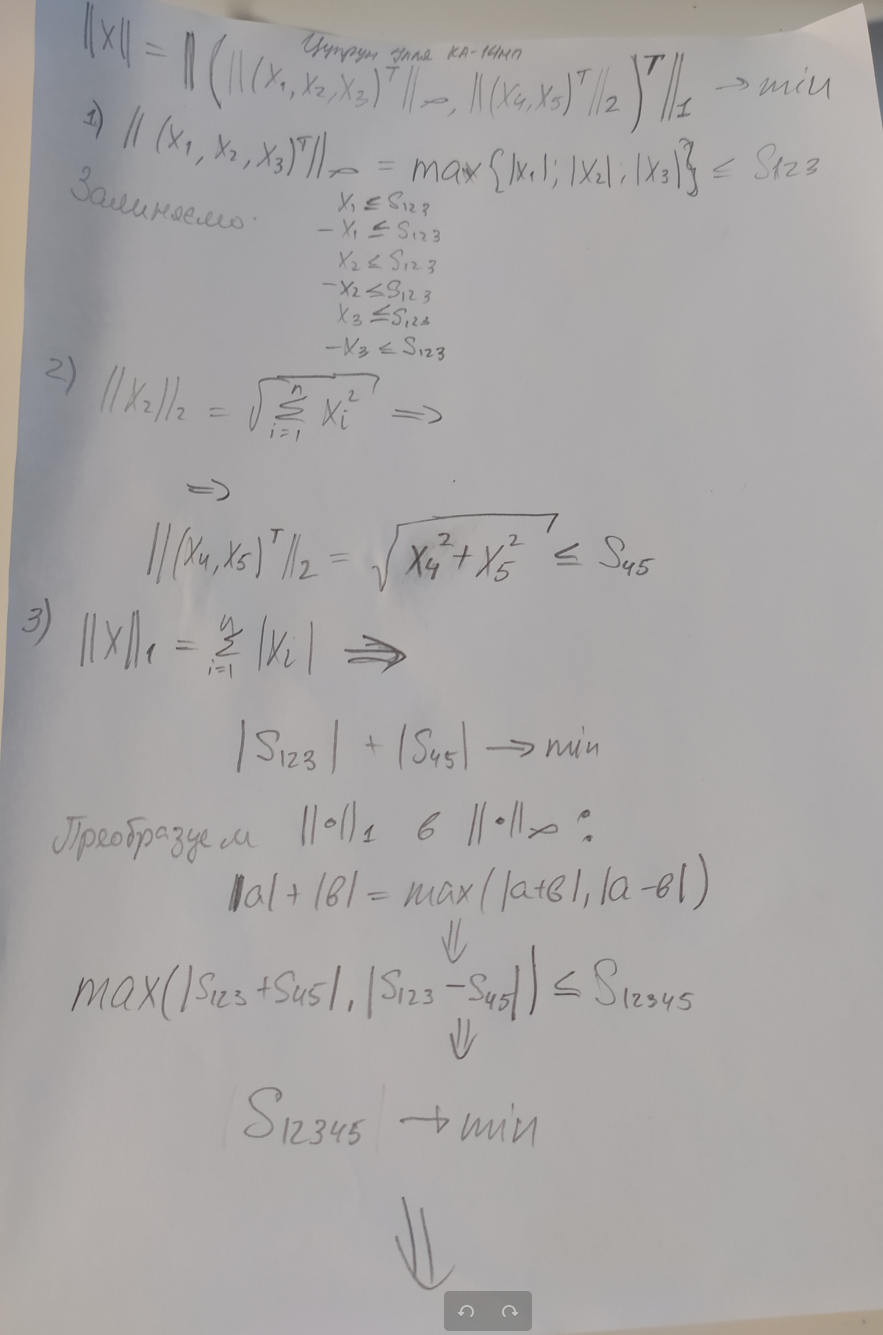

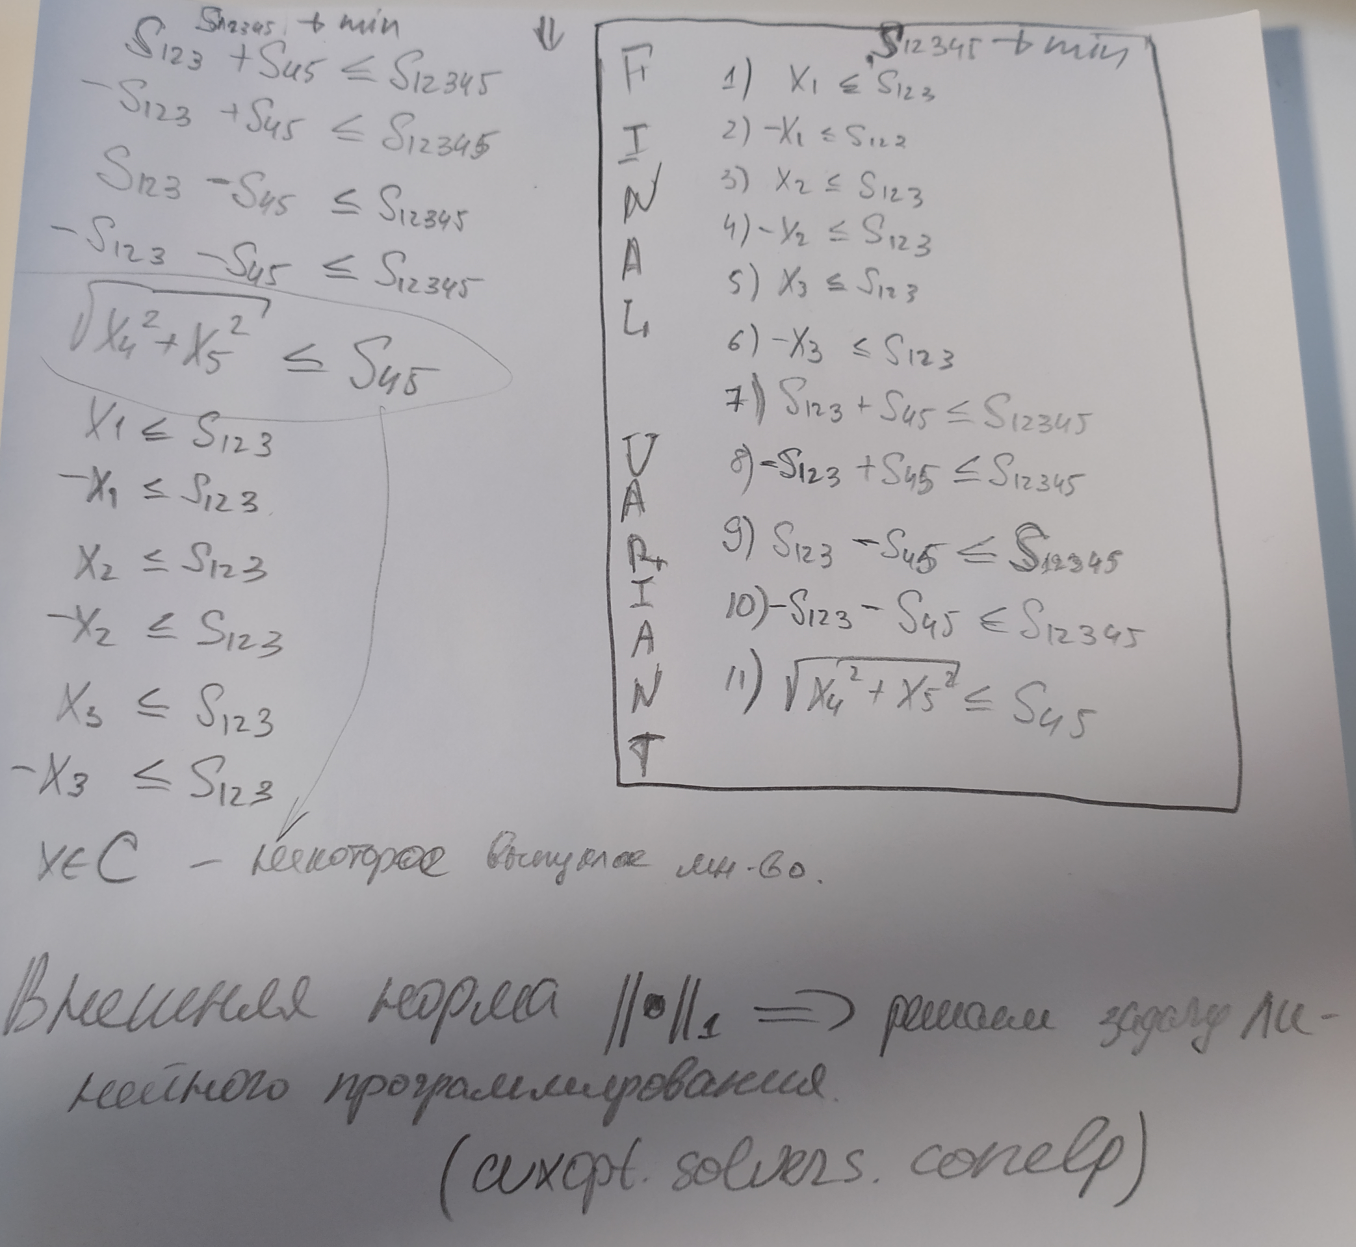

In [1]:
import cvxopt as opt
import numpy as np

In [2]:
def func(A, B, s, x0, u_max, u_min):
    if (A.size != (5,5) or B.size[1] != u_max.size[0] or B.size[1] != u_min.size[0] or x0.size != (5,1)):
        raise Exception("Input data has wrong dimention")
    else:
        n = B.size[1]
        m = n * s + 3
        u = opt.matrix(0.0, (n, s))
        I = opt.matrix(0.0, (m-3, m))
        I[::m-2] = 1.0
        I[0,m-2] = 0.0
        I[1,m-1] = 0.0

        G = opt.matrix([opt.matrix(0.0, (10, m)), I, -I, opt.matrix(0.0, (3, m))])
        c = opt.matrix(0.0, (m, 1))
        c[m-1] = 1.0
        V = opt.matrix([[1.,0.,0.,0.,0.],
                        [0.,1.,0.,0.,0.],
                        [0.,0.,1.,0.,0.],
                        [0.,0.,0.,1.,0.],
                        [0.,0.,0.,0.,1.]])

        for i in range(s):
            M = V * B
            
            G[0,n*(s-1-i):n*(s-i)]=  M[0,:n] # 1) x1
            G[1,n*(s-1-i):n*(s-i)]= -M[0,:n] # 2) x1
            G[2,n*(s-1-i):n*(s-i)]=  M[1,:n] # 3) x2
            G[3,n*(s-1-i):n*(s-i)]= -M[1,:n] # 4) x2
            G[4,n*(s-1-i):n*(s-i)]=  M[2,:n] # 5) x3
            G[5,n*(s-1-i):n*(s-i)]= -M[2,:n] # 6) x3
            
            G[-2,n*(s-1-i):n*(s-i)]=-M[3,:n] # 11) x4
            G[-1,n*(s-1-i):n*(s-i)]=-M[4,:n] # 11) x5
            
            V = A * V
        
        G[:6, -3] = 6 * [-1.0] # 1-6) s123
        
        G[6, -3] = 1.0   # 7) s123
        G[6, -2] = 1.0   # 7) s45
        G[6, -1] = -1.0  # 7) s12345
        
        G[7, -3] = -1.0 # ...
        G[7, -2] = 1.0
        G[7, -1] = -1.0
        
        G[8, -3] = 1.0 # ...
        G[8, -2] = -1.0
        G[8, -1] = -1.0
        
        G[9, -3] = -1.0 # ...
        G[9, -2] = -1.0
        G[9, -1] = -1.0
        
        G[-3, -2] = -1.0 # 11) s45

        b = V * x0
        h = opt.matrix([-b[0]]+[b[0]]+
                       [-b[1]]+[b[1]]+
                       [-b[2]]+[b[2]]+
                        4 * [0.0] + 
                       s*[u_max]+s*[-u_min] + 
                      [0.0] + [b[3]] + [b[4]])
        dims = {'l': 2*n*s+10, 'q': [3], 's': []}
    result = opt.solvers.conelp(c, G, h, dims)['x']
    for i in range(s):
        u[:,i] = result[n*i:n*(i+1)]
    return u

In [3]:
A = opt.matrix([[1.,2.,7,6,5],
               [9,3,8,1,12],
               [10,0,2,4,6],
               [7,6,2,3,4],
               [5,8,1,9,10]]).T
B = opt.matrix([[1.,2.,3.,4.,5.],
                [7.,4.,8.,10.,0.],
                [2.,1.,9.,6.,7.],
                [4.,3.,1.,8.,5.],
                [7.,9.,11.,2.,1.]]).T
x0 = opt.matrix([3.,2.,5.,8.,1.])
u_max = opt.matrix([100.,200.,300.,100.,400.])
u_min = opt.matrix([-100.,-200.,-300.,-100.,-400.])
r=func(A,B,1,x0,u_max,u_min)

print(r)

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.2000e+03  3e+03  1e-01  7e+00  1e+00
 1:  1.9559e+01 -3.6697e+02  4e+02  2e-02  1e+00  5e+00
 2:  7.5097e+00 -1.3302e+01  2e+01  1e-03  7e-02  2e-01
 3:  1.3258e-01 -2.2351e-01  4e-01  2e-05  1e-03  3e-03
 4:  1.3258e-03 -2.2347e-03  4e-03  2e-07  1e-05  3e-05
 5:  1.3258e-05 -2.2347e-05  4e-05  2e-09  1e-07  3e-07
 6:  1.3258e-07 -2.2347e-07  4e-07  2e-11  1e-09  3e-09
 7:  1.3258e-09 -2.2419e-09  4e-09  2e-13  1e-11  3e-11
Optimal solution found.
[ 4.40e+01]
[-3.63e+01]
[-5.89e+00]
[-2.09e+01]
[ 6.94e+00]

